In [559]:
## Importing required libraries
import sqlite3
import pandas as pd
import numpy as np
import seaborn as sns
import itertools
import matplotlib.pyplot as plt
import sklearn
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
from sklearn.calibration import CalibratedClassifierCV
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer
from time import time
from sklearn.decomposition import PCA, FastICA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings

warnings.simplefilter("ignore")

In [560]:
df_mat = pd.read_csv('student-mat.csv')
df_mat.head(15)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


In [561]:
df_por = pd.read_csv('student-por.csv')
df_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [562]:
df = pd.concat([df_por, df_mat])
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [563]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [564]:
duplicates = df[df.duplicated(subset=["school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","nursery","internet"], keep='first')]
duplicates

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
155,GP,M,17,U,GT3,T,2,1,other,other,...,5,4,5,1,2,5,22,9,7,6
161,GP,M,16,U,GT3,T,4,4,teacher,teacher,...,3,3,2,2,1,5,16,9,9,8
195,GP,M,16,U,GT3,T,3,3,services,other,...,4,2,3,1,2,3,0,11,12,13
270,GP,M,16,U,GT3,T,4,4,services,services,...,5,3,2,1,2,5,4,14,15,15
376,GP,F,18,U,GT3,T,1,1,other,other,...,4,5,5,1,2,2,0,14,14,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,0,7,5,0
388,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,0,7,9,8
389,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,0,6,5,0
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16


In [565]:
#cols = ["school", "sex", "age", "address", "famsize", "Pstatus", "Medu", "Fedu", "Mjob", "Fjob", "reason", "nursery",
#        "romantic", "higher", "internet", "guardian", "health", "Walc", "Dalc"]
#df = df.drop_duplicates(subset=cols, keep='first')

In [566]:
df.drop("school", axis=1, inplace=True)
print(df.shape)
df.drop_duplicates()
print(df.shape)

(1044, 32)
(1044, 32)


In [567]:
num_df = df.select_dtypes(exclude=['object'])
cat_df = df.select_dtypes(include=['object'])
num_df.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3'],
      dtype='object')

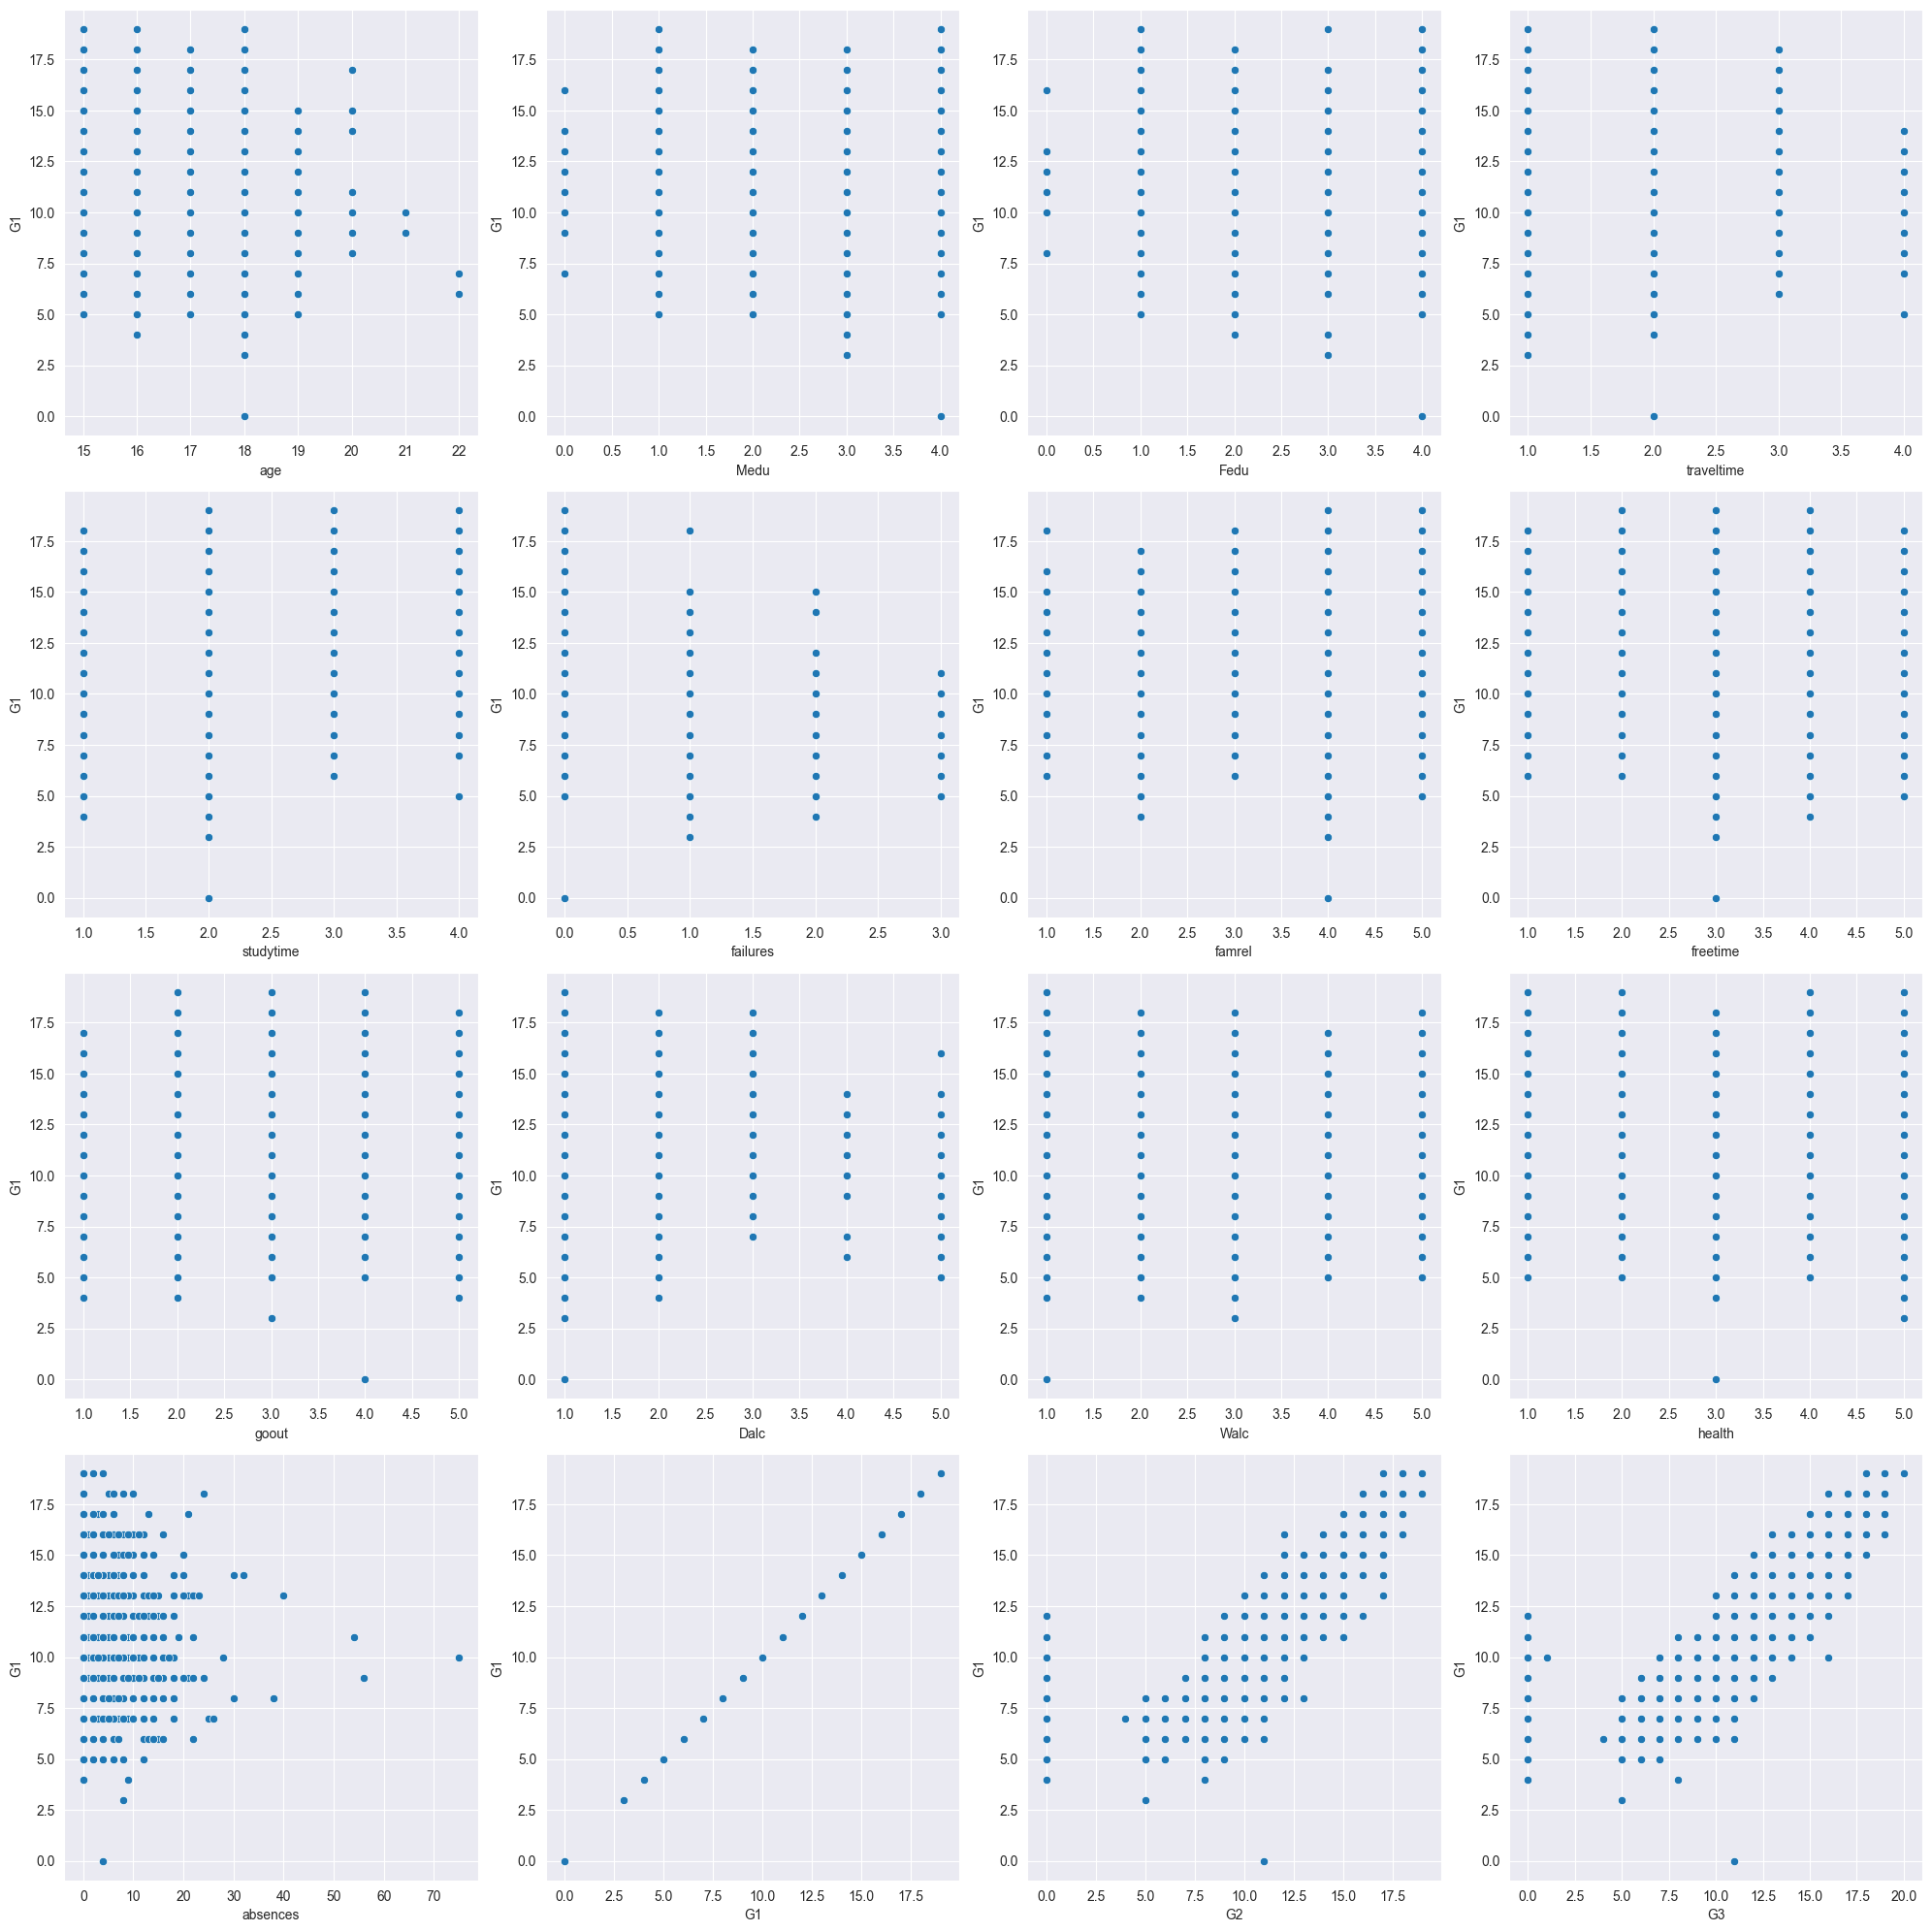

In [568]:
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
axes_flattened = axes.reshape(-1)
for i in range(len(num_df.columns)):
    ax = axes_flattened[i]
    sns.scatterplot(
        x=num_df.iloc[:, i],
        y='G1',
        data=num_df.dropna(),
        ax=ax,
    )
fig.tight_layout(pad=1.0)

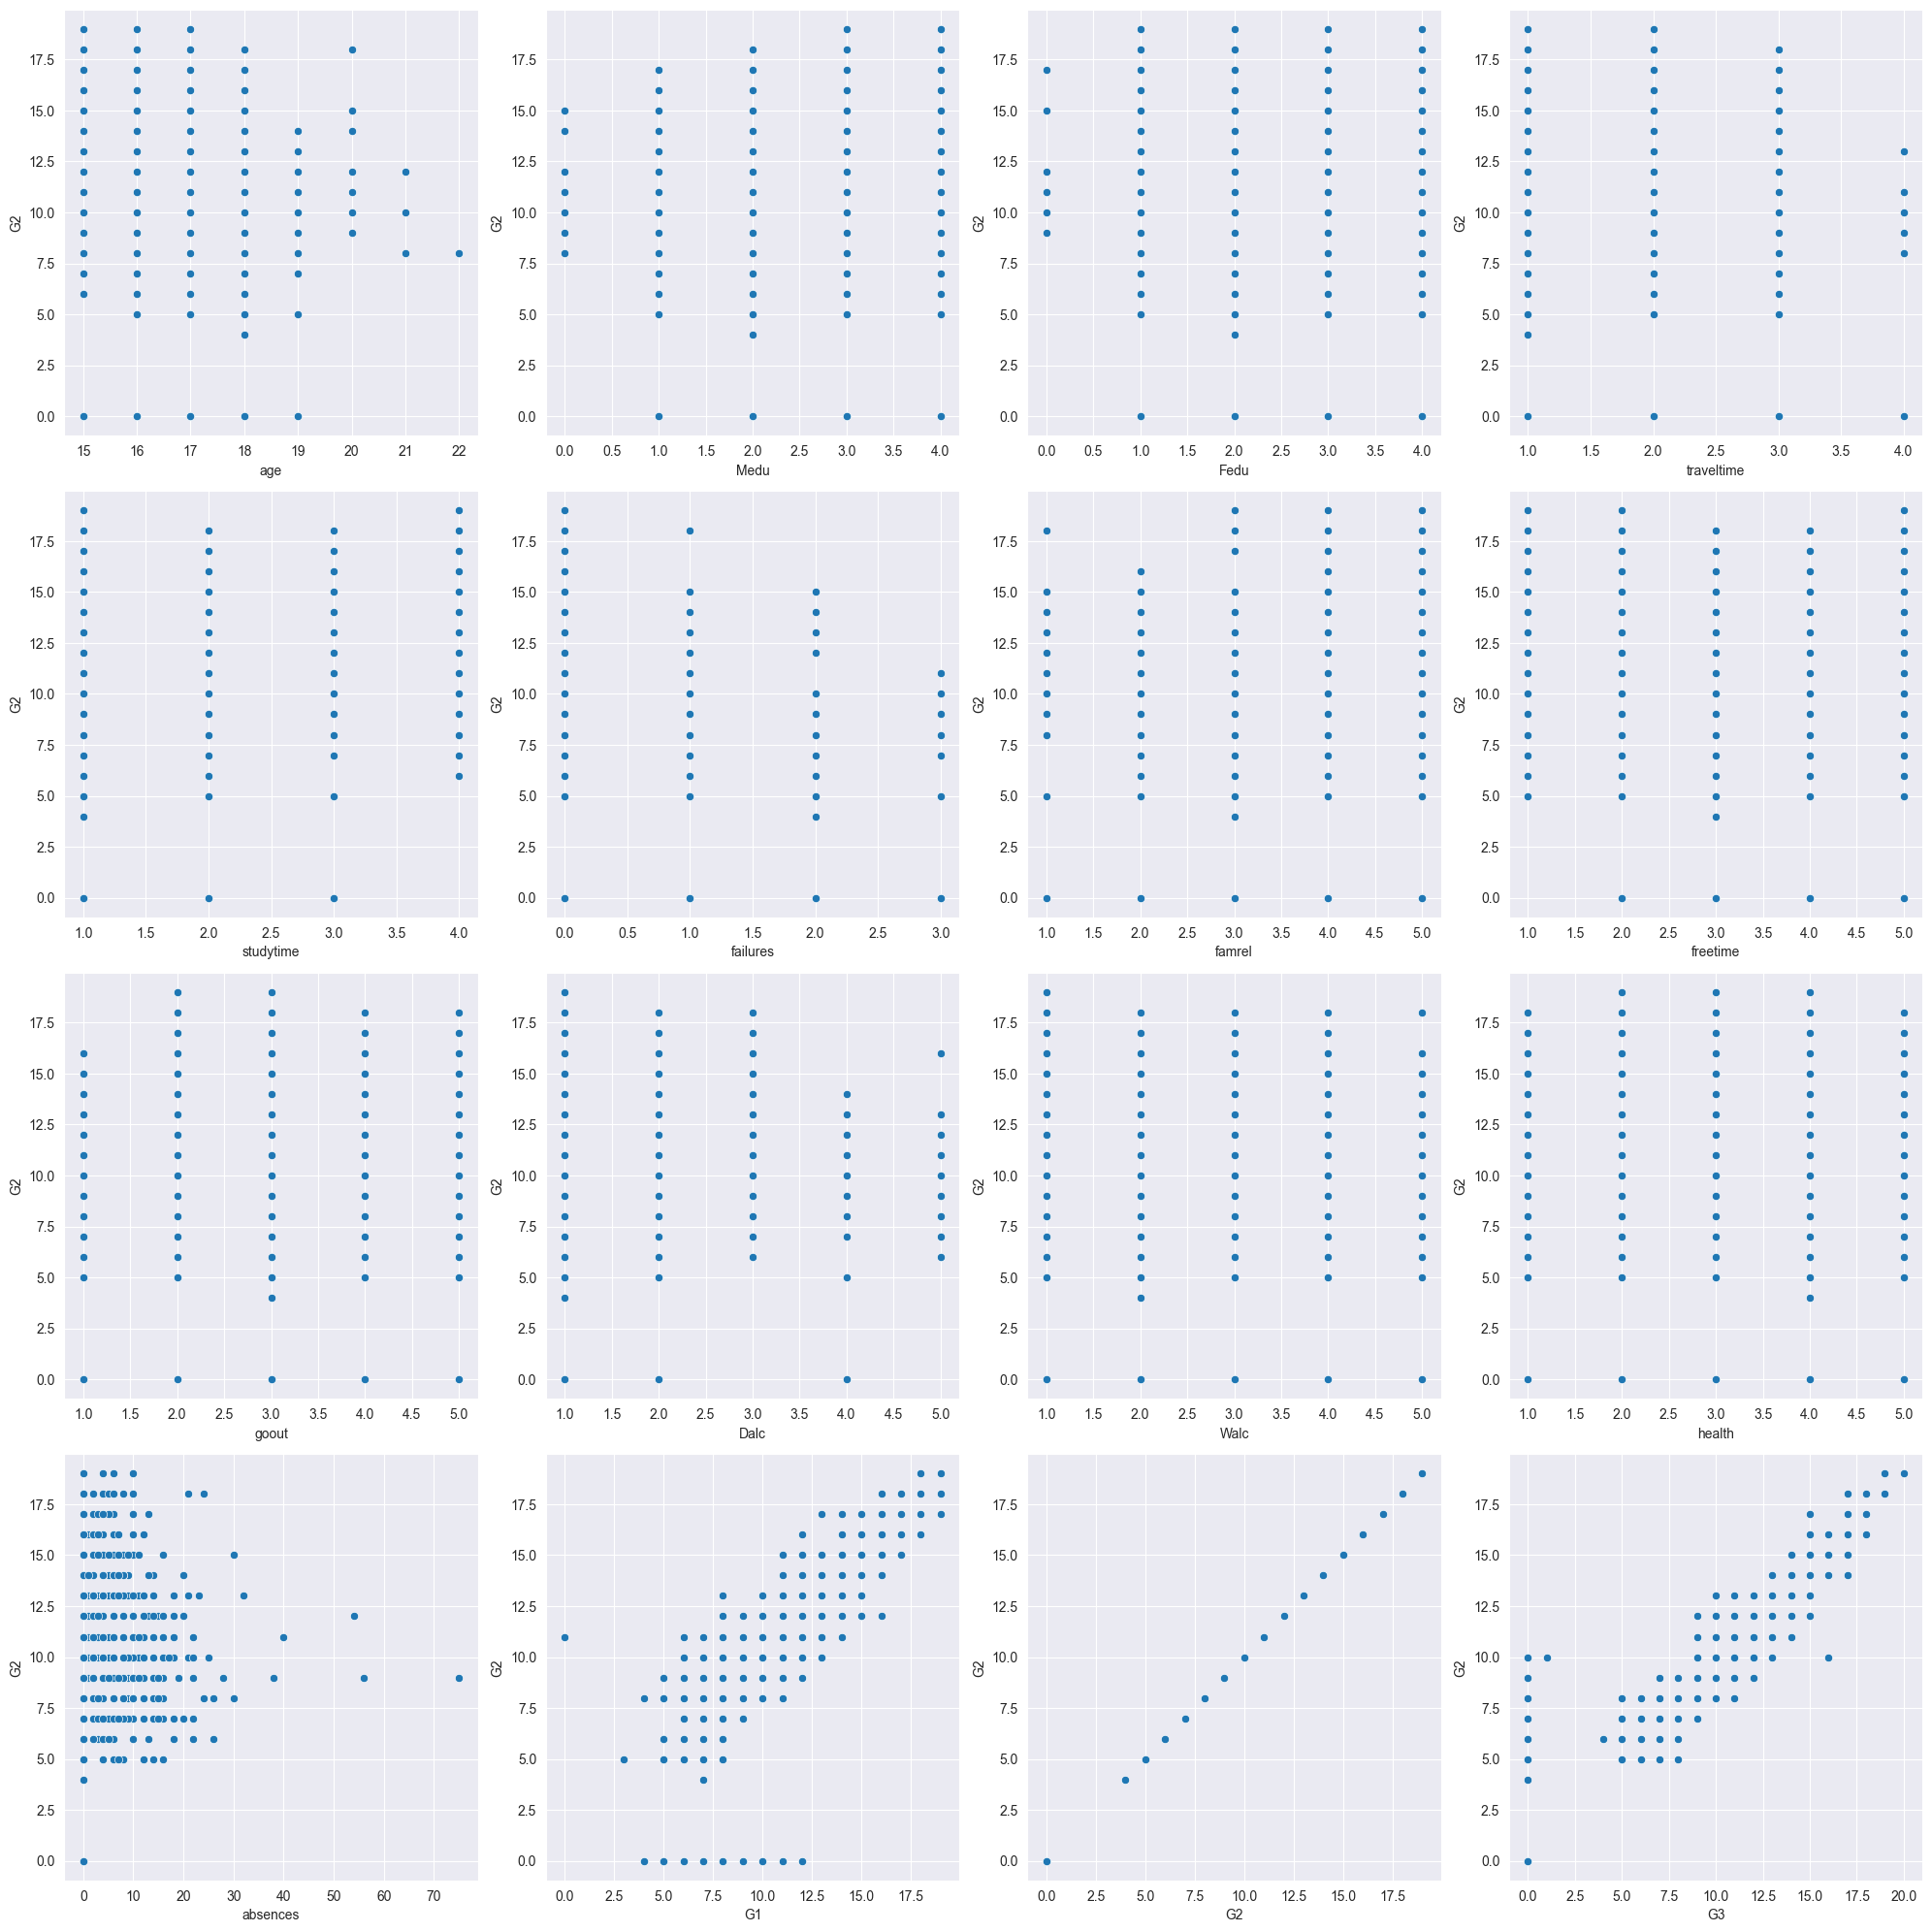

In [569]:
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
axes_flattened = axes.reshape(-1)
for i in range(len(num_df.columns)):
    ax = axes_flattened[i]
    sns.scatterplot(
        x=num_df.iloc[:, i],
        y='G2',
        data=num_df.dropna(),
        ax=ax,
    )
fig.tight_layout(pad=1.0)

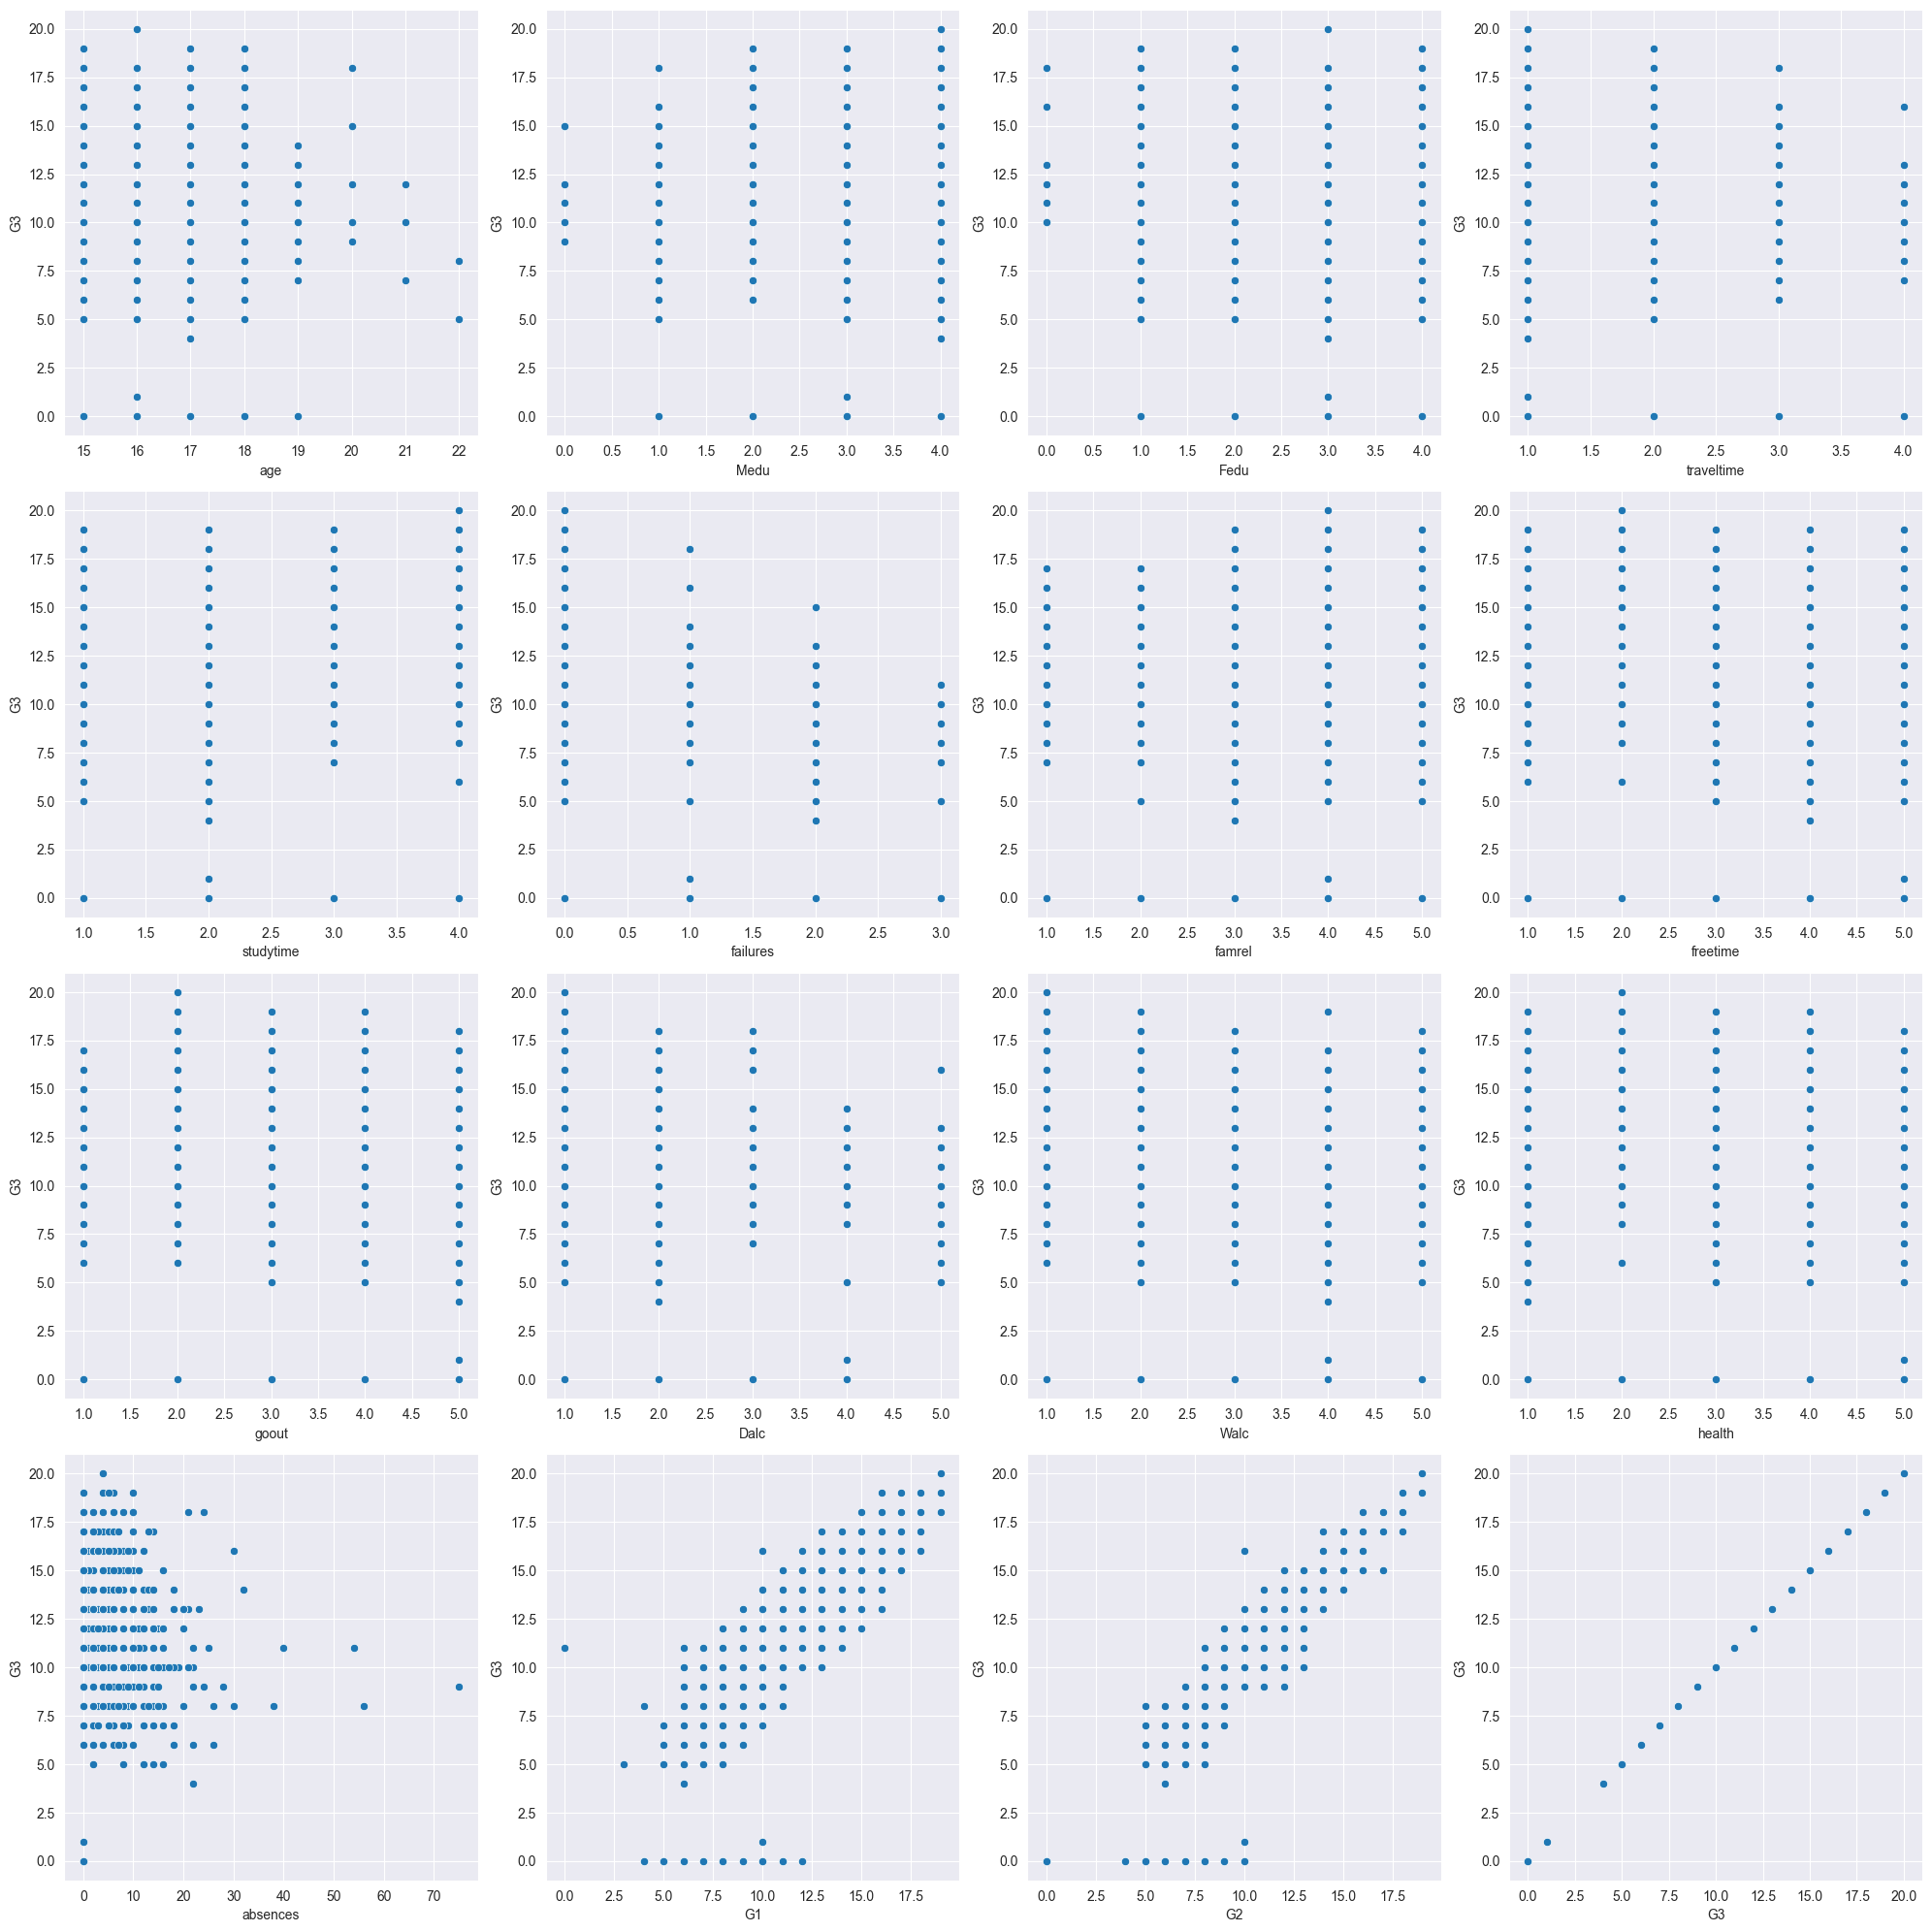

In [570]:
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
axes_flattened = axes.reshape(-1)
for i in range(len(num_df.columns)):
    ax = axes_flattened[i]
    sns.scatterplot(
        x=num_df.iloc[:, i],
        y='G3',
        data=num_df.dropna(),
        ax=ax,
    )
fig.tight_layout(pad=1.0)

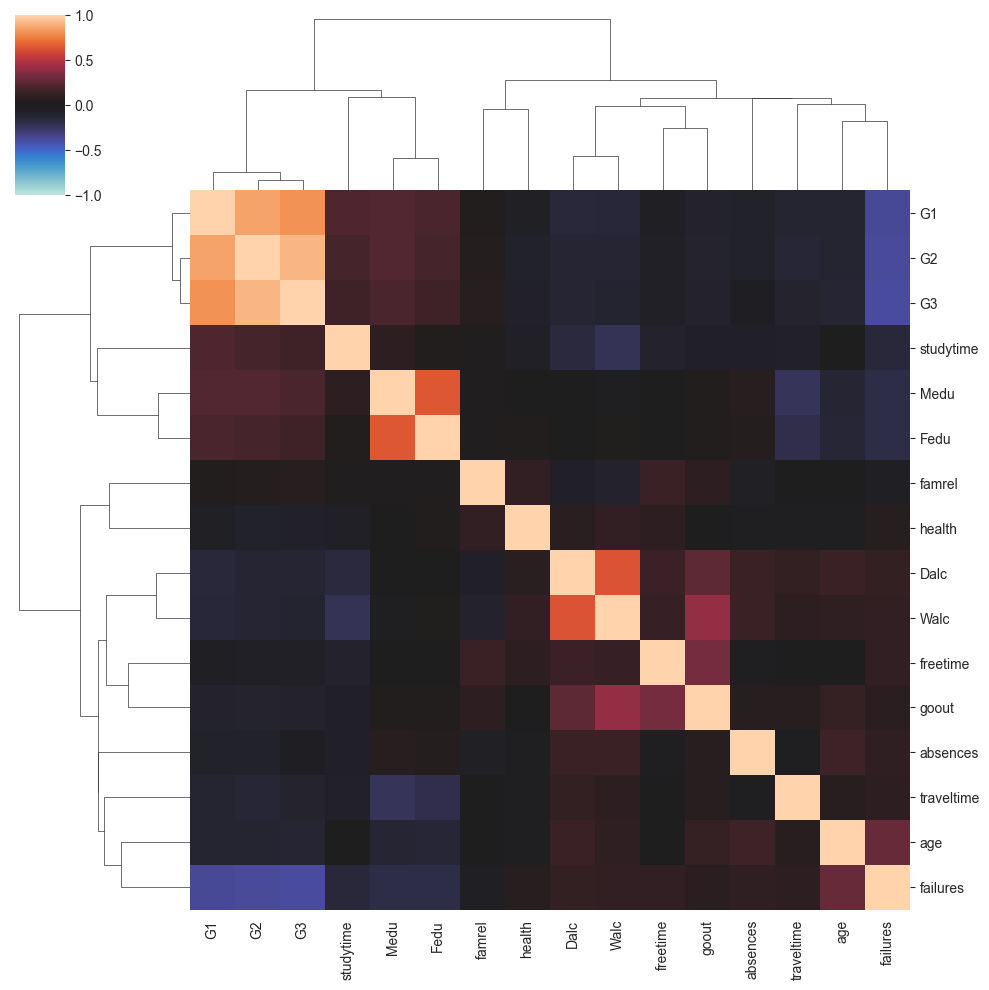

In [571]:
def corrplot(df, method="pearson", annot=True, **kwargs):
    sns.clustermap(
        df.corr(method),
        vmin=-1.0,
        vmax=1.0,
        cmap="icefire",
        method="complete",
        annot=annot,
        **kwargs,
    )

corrplot(num_df, annot=None)

<AxesSubplot:>

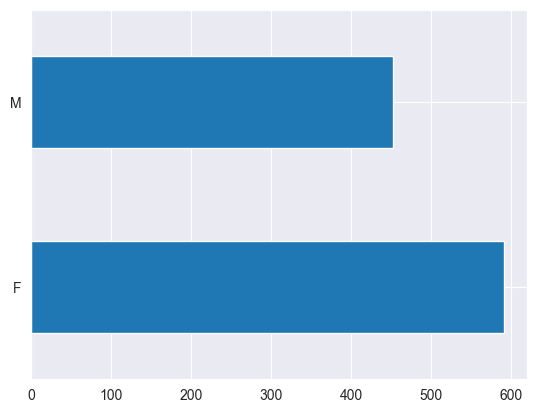

In [572]:
df.sex.value_counts().plot.barh()

In [573]:
label_encoder = LabelEncoder()
categ = ['sex', 'address','famsize','Pstatus','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']
df[categ] = df[categ].apply(label_encoder.fit_transform)
df

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,18,1,0,0,4,4,at_home,teacher,course,...,4,3,4,1,1,3,4,0,11,11
1,0,17,1,0,1,1,1,at_home,other,course,...,5,3,3,1,1,3,2,9,11,11
2,0,15,1,1,1,1,1,at_home,other,other,...,4,3,2,2,3,3,6,12,13,12
3,0,15,1,0,1,4,2,health,services,home,...,3,2,2,1,1,5,0,14,14,14
4,0,16,1,0,1,3,3,other,other,home,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,20,1,1,0,2,2,services,services,course,...,5,5,4,4,5,4,11,9,9,9
391,1,17,1,1,1,3,1,services,services,course,...,2,4,5,3,4,2,3,14,16,16
392,1,21,0,0,1,1,1,other,other,course,...,5,5,3,3,3,3,3,10,8,7
393,1,18,0,1,1,3,2,services,other,course,...,4,4,1,3,4,5,0,11,12,10


In [574]:
df = pd.get_dummies(data =df, columns=["Mjob","Fjob", 'reason','guardian'])
df

,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,0,18,1,0,0,4,4,2,2,0,...,0,0,1,1,0,0,0,0,1,0
1,0,17,1,0,1,1,1,1,2,0,...,1,0,0,1,0,0,0,1,0,0
2,0,15,1,1,1,1,1,1,2,0,...,1,0,0,0,0,1,0,0,1,0
3,0,15,1,0,1,4,2,1,3,0,...,0,1,0,0,1,0,0,0,1,0
4,0,16,1,0,1,3,3,1,2,0,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,20,1,1,0,2,2,1,2,2,...,0,1,0,1,0,0,0,0,0,1
391,1,17,1,1,1,3,1,2,1,0,...,0,1,0,1,0,0,0,0,1,0
392,1,21,0,0,1,1,1,1,1,3,...,1,0,0,1,0,0,0,0,0,1
393,1,18,0,1,1,3,2,3,1,0,...,1,0,0,1,0,0,0,0,1,0


In [575]:
col = ['age', 'Fedu','traveltime', 'studytime','famrel','freetime', 'goout','Dalc','Walc','health','absences']
df[col]= df[col].apply(lambda x: (x-x.min())/(x.max()-x.min()), axis=0)
df

,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,0,18,1,0,0,4,4,2,2,0,...,0,0,1,1,0,0,0,0,1,0
1,0,17,1,0,1,1,1,1,2,0,...,1,0,0,1,0,0,0,1,0,0
2,0,15,1,1,1,1,1,1,2,0,...,1,0,0,0,0,1,0,0,1,0
3,0,15,1,0,1,4,2,1,3,0,...,0,1,0,0,1,0,0,0,1,0
4,0,16,1,0,1,3,3,1,2,0,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,20,1,1,0,2,2,1,2,2,...,0,1,0,1,0,0,0,0,0,1
391,1,17,1,1,1,3,1,2,1,0,...,0,1,0,1,0,0,0,0,1,0
392,1,21,0,0,1,1,1,1,1,3,...,1,0,0,1,0,0,0,0,0,1
393,1,18,0,1,1,3,2,3,1,0,...,1,0,0,1,0,0,0,0,1,0


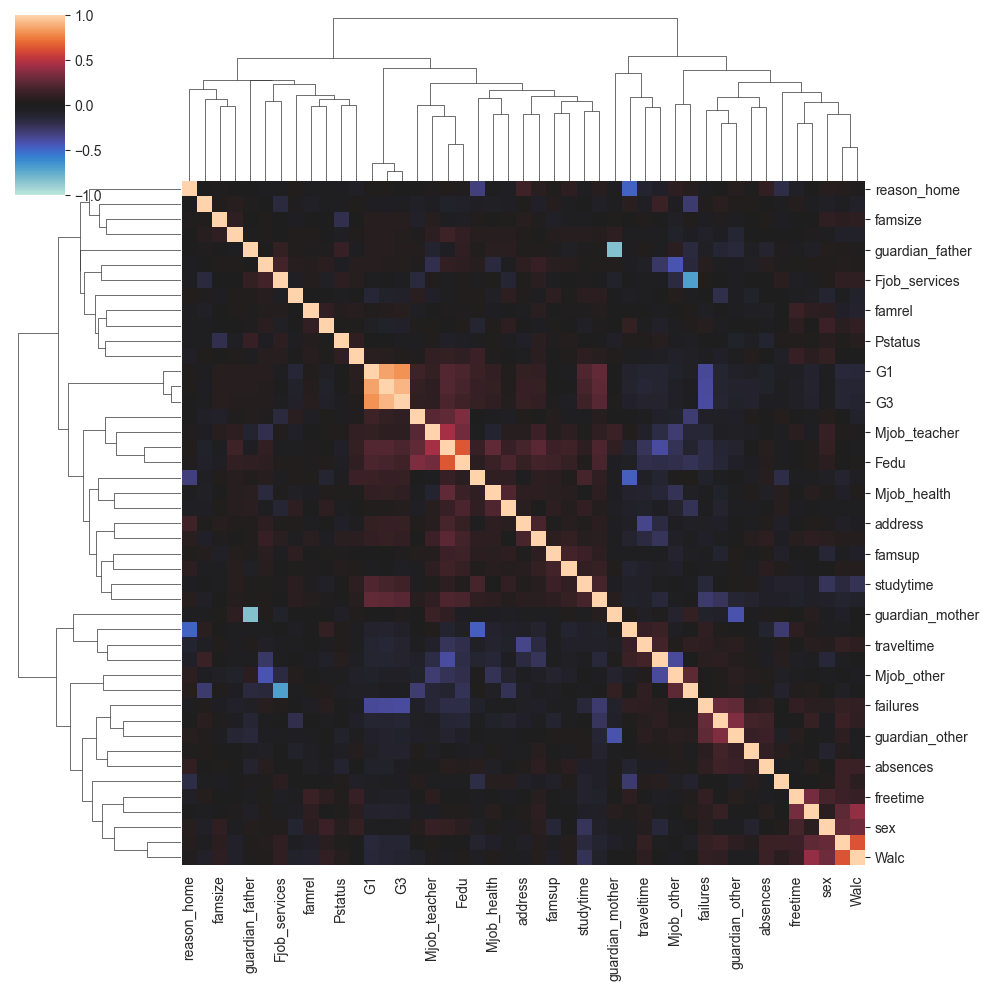

In [576]:
num_df = df.select_dtypes(exclude='object')
corrplot(num_df, annot=None)

### удаление нулей в g3

In [577]:
grades = ['G1', 'G2', 'G3']
list_zeros_math = pd.DataFrame(df[grades].loc[df['G3']==0])
list_zeros_math

,G1,G2,G3
163,11,9,0
440,7,0,0
519,8,7,0
563,7,0,0
567,4,0,0
583,8,6,0
586,8,8,0
597,9,0,0
603,5,0,0
605,5,0,0


In [578]:
df.drop(df[df['G3']==0].index, inplace=True)
df.shape

(952, 45)

# Раздел Регрессии
### Создание двух датафреймов для трейн и тест регрессий

In [579]:
X = df.drop(["G1","G2","G3"], axis = 1)
y = df[["G1","G2","G3"]]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=12)
train_df = pd.concat([X_train, y_train])
train_df = X_train
train_df["G1"] = y_train["G1"]
train_df["G2"] = y_train["G2"]
train_df["G3"] = y_train["G3"]
test_df = pd.concat([X_test, y_test],axis=1)

In [580]:
nan_df = (df.isnull().mean() * 100).reset_index()
nan_df

,index,0
0,sex,0.0
1,age,0.0
2,address,0.0
3,famsize,0.0
4,Pstatus,0.0
5,Medu,0.0
6,Fedu,0.0
7,traveltime,0.0
8,studytime,0.0
9,failures,0.0


In [581]:
def get_almost_constant_columns(df, dropna=True):
    cols = []
    for i in df:
        if dropna:
            counts = df[i].dropna().value_counts()
        else:
            counts = df[i].value_counts()
        most_popular_value_count = counts.iloc[0]
        if (most_popular_value_count / len(df)) * 100 > 96:
            cols.append(i)
    return cols

In [582]:
overfit_cat = get_almost_constant_columns(cat_df)
overfit_cat

[]

In [583]:
overfit_num = get_almost_constant_columns(num_df, dropna=True)
overfit_num

['Fjob_health']

In [584]:
train_df = train_df.drop(overfit_num, axis=1)
test_df = test_df.drop(overfit_num, axis = 1)

In [642]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

### Регрессии через  KFold

In [636]:
#Проверка KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)
XX = df.drop(["G1","G2","G3"], axis = 1)
Y = df[["G3"]]

In [641]:
modelSGD = SGDRegressor()
for train_index, test_index in kf.split(XX):
    X_train, X_test = XX.iloc[train_index], XX.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    modelSGD.partial_fit(X_train, y_train)
    score = modelSGD.score(X_test, y_test)
    print(score)
print(score)

-4.190580095198246
-1.4145978864558009
-0.23096087464404147
-1.7915599832925375
-0.24581852715865082
-0.24581852715865082


In [634]:
modelRidge = Ridge(alpha=1,solver='saga')
for train_index, test_index in kf.split(XX):
    X_train, X_test = XX.iloc[train_index], XX.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    modelRidge.fit(X_train, y_train)
    score = modelRidge.score(X_test, y_test)
    print(score)
print(score)

0.2627400142759351
0.23476732303003545
0.2754993899532058
0.2970583907662451
0.2699900115548407
0.2699900115548407


In [631]:
model = LinearRegression()
for train_index, test_index in kf.split(XX):
    X_train, X_test = XX.iloc[train_index], XX.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print(score)
print(score)

0.2633633551358494
0.23388194967094256
0.2744802889604743
0.2960412523886782
0.269426944396406
0.269426944396406


### Отдельные Регрессии

In [645]:
#Разбиение на Train Test для регрессий.
delete = ["G1","G2","G3"] #  "G1","G2","G3" или "G2","G3" или "G3"
target = ["G3"]
mX_train = train_df.drop(delete, axis = 1)
mY_train = train_df[target]
mX_test = test_df.drop(delete, axis = 1)
mY_test = test_df[target]

In [589]:
mX_train.shape, mX_test.shape, mY_train.shape, mY_test.shape

((714, 41), (238, 41), (714, 1), (238, 1))

In [590]:
Gradient_model = GradientBoostingRegressor()
Gradient_model.fit(mX_train, mY_train)
Gradient_score = Gradient_model.predict(mX_test)
Gradient_model.score(mX_test,mY_test)

0.30200795268833835

In [646]:
LinearRegression_model = LinearRegression()
LinearRegression_model.fit(mX_train, mY_train)
Linearscore = LinearRegression_model.predict(mX_test)
LinearRegression_model.score(mX_test,mY_test)

0.2766793172043458

In [647]:
pf = PolynomialFeatures()
x_poly = pf.fit_transform(mX_train)
LinearRegression_model.fit(x_poly,mY_train)
LinearRegression_model.score(mX_test,mY_test)

ValueError: X has 41 features, but LinearRegression is expecting 903 features as input.

[Text(0.5, 1.0, 'Exam predictions Linear Regression'),
 Text(0.5, 0, 'True values'),
 Text(0, 0.5, 'Predicted values')]

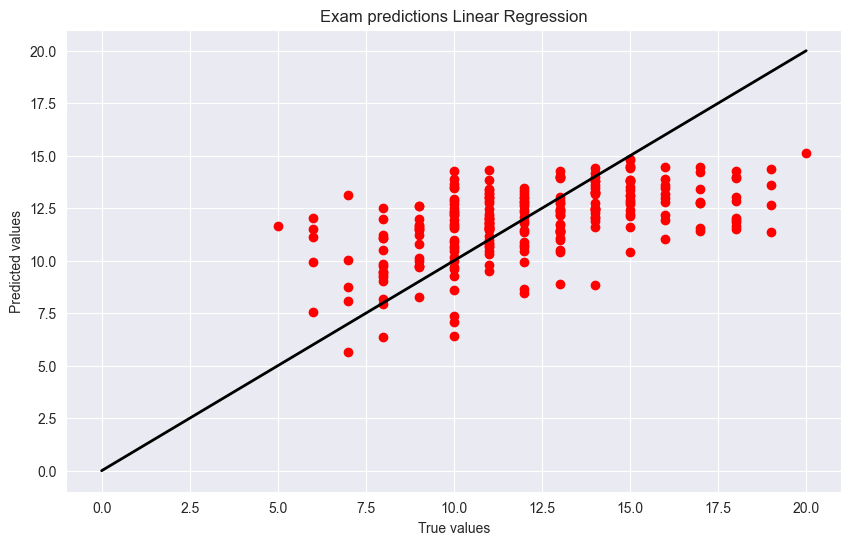

In [592]:
x_l = np.linspace(0,20,100)
y_l = x_l
fig, g1 = plt.subplots(1,1,figsize=(10,6))
g1.scatter(mY_test,Linearscore, c='r')
g1.plot(x_l, y_l, c='black', linewidth=2)
g1.set(title='Exam predictions Linear Regression', xlabel='True values', ylabel='Predicted values')

In [593]:
from sklearn import linear_model
lasso_model = linear_model.Lasso(alpha=0.1)
lasso_model.fit(mX_train,mY_train)
lasso_predict = lasso_model.predict(mX_test)
lasso_model.score(mX_test,mY_test)

0.19568085376927635

[Text(0.5, 1.0, 'Exam predictions Lasso Regression'),
 Text(0.5, 0, 'True values'),
 Text(0, 0.5, 'Predicted values')]

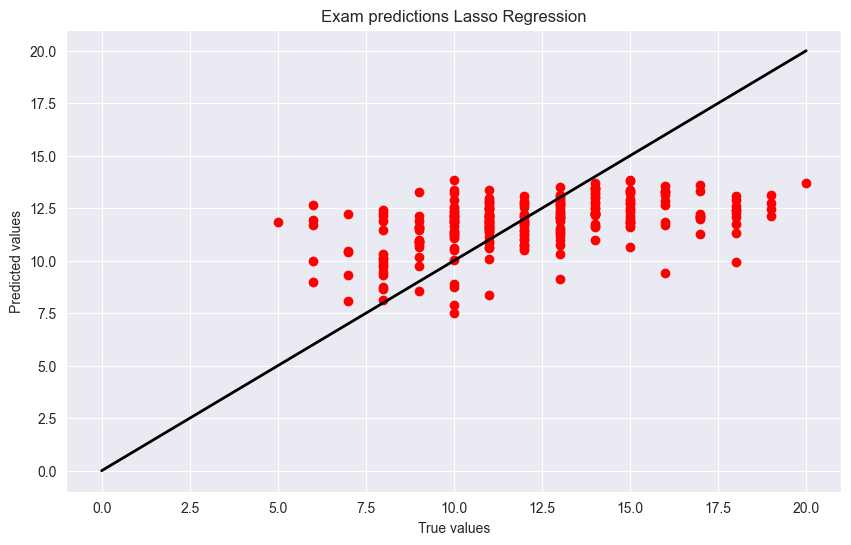

In [594]:
x_l = np.linspace(0,20,100)
y_l = x_l
fig, g1 = plt.subplots(1,1,figsize=(10,6))
g1.scatter(mY_test,lasso_predict, c='r')
g1.plot(x_l, y_l, c='black', linewidth=2)
g1.set(title='Exam predictions Lasso Regression', xlabel='True values', ylabel='Predicted values')

In [595]:
from sklearn import tree
from sklearn.tree import plot_tree

In [596]:
Tree_model = tree.DecisionTreeRegressor(max_depth=6,min_samples_leaf=20,min_samples_split= 2)
Tree_model.fit(mX_train,mY_train)
Treescore = Tree_model.predict(mX_test)
Tree_model.score(mX_test,mY_test)

0.19702737803818227

[Text(0.5, 1.0, 'Exam predictions Tree regression'),
 Text(0.5, 0, 'True values'),
 Text(0, 0.5, 'Predicted values')]

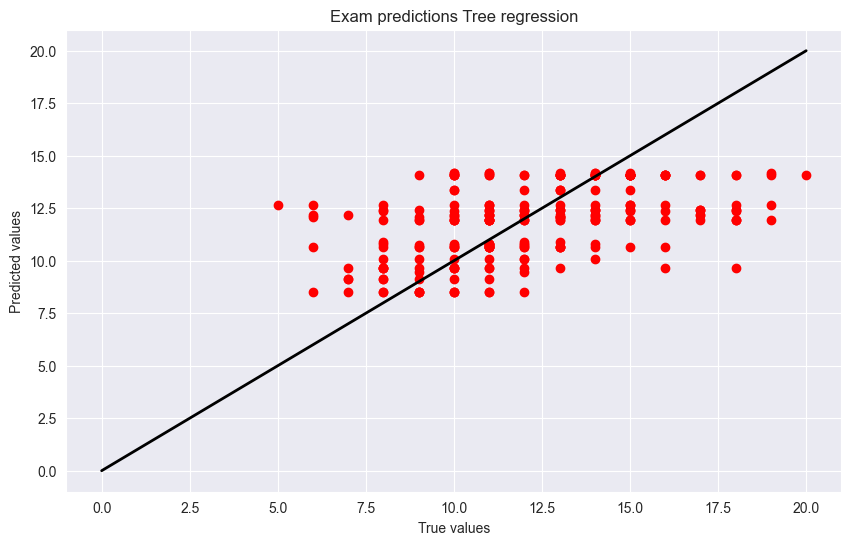

In [597]:
x_l = np.linspace(0,20,100)
y_l = x_l
fig, g1 = plt.subplots(1,1,figsize=(10,6))
g1.scatter(mY_test,Treescore, c='r')
g1.plot(x_l, y_l, c='black', linewidth=2)
g1.set(title='Exam predictions Tree regression', xlabel='True values', ylabel='Predicted values')

[Text(0.7299107142857143, 0.9285714285714286, 'x[9] <= 0.5\nsquared_error = 8.259\nsamples = 714\nvalue = 11.866'),
 Text(0.53125, 0.7857142857142857, 'x[10] <= 0.5\nsquared_error = 7.53\nsamples = 607\nvalue = 12.306'),
 Text(0.3125, 0.6428571428571429, 'x[5] <= 2.5\nsquared_error = 7.454\nsamples = 528\nvalue = 12.515'),
 Text(0.10714285714285714, 0.5, 'x[15] <= 0.5\nsquared_error = 5.829\nsamples = 221\nvalue = 11.778'),
 Text(0.07142857142857142, 0.35714285714285715, 'squared_error = 1.91\nsamples = 24\nvalue = 10.083'),
 Text(0.14285714285714285, 0.35714285714285715, 'x[24] <= 1.5\nsquared_error = 5.913\nsamples = 197\nvalue = 11.985'),
 Text(0.07142857142857142, 0.21428571428571427, 'x[17] <= 0.5\nsquared_error = 5.562\nsamples = 74\nvalue = 12.757'),
 Text(0.03571428571428571, 0.07142857142857142, 'squared_error = 4.539\nsamples = 47\nvalue = 12.404'),
 Text(0.10714285714285714, 0.07142857142857142, 'squared_error = 6.752\nsamples = 27\nvalue = 13.37'),
 Text(0.21428571428571427

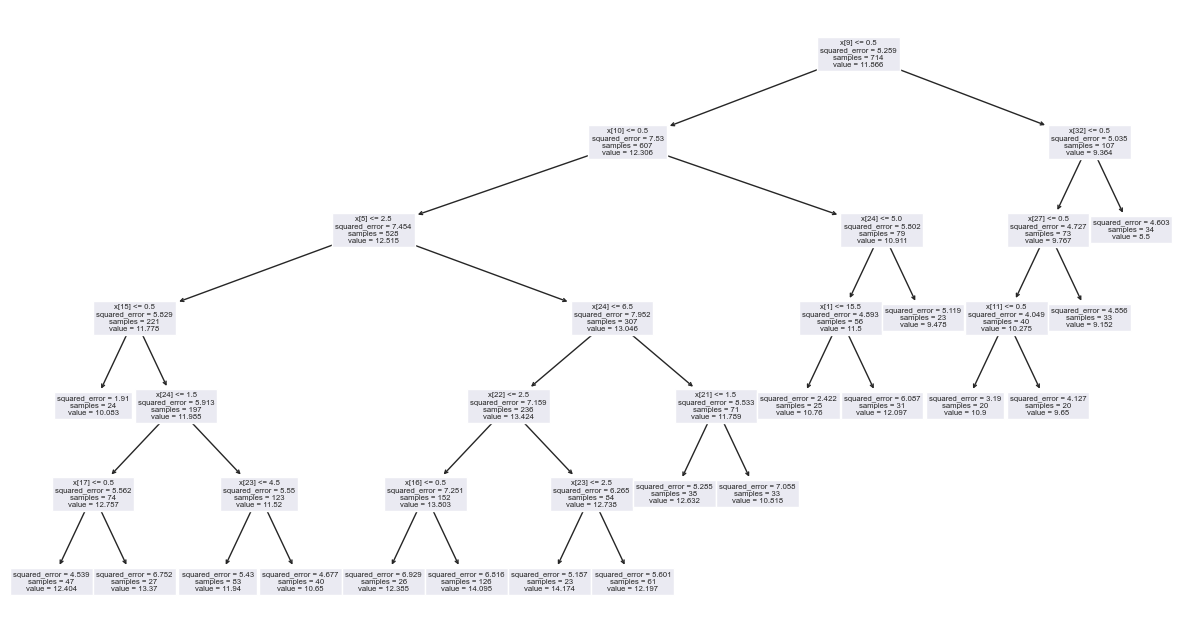

In [598]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
tree.plot_tree(Tree_model)


# Раздел классификации.
## Разделение G3 на диапазоны 0-5 5-10 10-15 15-20

In [600]:
def trans(x):
    if x == 20:
        return 3
    return x % 5

In [601]:
# Новый датафрейм чтобы не мешать старому
df1 = df
df1['G3'] = df1['G3'].apply(trans)
df1['G2'] = df1['G2'].apply(trans)
df1['G1'] = df1['G1'].apply(trans)

In [602]:
X = df1.drop(["G1", "G2", "G3"], axis=1)
y = df1[["G1", "G2", "G3"]]
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size=0.25, random_state=12)
train_df_1 = pd.concat([X_train_1, y_train_1])
train_df_1 = X_train_1
train_df_1["G1"] = y_train_1["G1"]
train_df_1["G2"] = y_train_1["G2"]
train_df_1["G3"] = y_train_1["G3"]
test_df_1 = pd.concat([X_test_1, y_test_1], axis=1)

In [603]:
#Разбиение на Train Test для классификаций.
delete = ["G1","G2","G3"] #  "G1","G2","G3" или "G2","G3" или "G3"
target = ["G3"]
mX_train_1 = train_df_1.drop(delete, axis = 1)
mY_train_1 = train_df_1[target]
mX_test_1 = test_df_1.drop(delete, axis = 1)
mY_test_1 = test_df_1[target]

In [604]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from catboost import CatBoostClassifier

In [605]:
Logic_model = LogisticRegression()
Logic_model.fit(mX_train_1, mY_train_1)
Logic_model.score(mX_test_1,mY_test_1)

0.21008403361344538

In [606]:
tree_class_model = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
tree_class_model.fit(mX_train_1, mY_train_1)
tree_class_model.predict(mX_test_1)
tree_class_model.score(mX_test_1,mY_test_1)


0.23949579831932774

[Text(0.6693548387096774, 0.9285714285714286, 'x[9] <= 0.5\ngini = 0.794\nsamples = 714\nvalue = [178, 160, 115, 147, 114]'),
 Text(0.46774193548387094, 0.7857142857142857, 'x[25] <= 0.5\ngini = 0.795\nsamples = 607\nvalue = [139, 149, 101, 118, 100]'),
 Text(0.2903225806451613, 0.6428571428571429, 'x[18] <= 4.5\ngini = 0.797\nsamples = 512\nvalue = [110, 119, 93, 104, 86]'),
 Text(0.16129032258064516, 0.5, 'x[30] <= 0.5\ngini = 0.791\nsamples = 360\nvalue = [87, 91, 62, 68, 52]'),
 Text(0.12903225806451613, 0.35714285714285715, 'x[23] <= 1.5\ngini = 0.792\nsamples = 344\nvalue = [80, 87, 62, 68, 47]'),
 Text(0.06451612903225806, 0.21428571428571427, 'x[5] <= 2.5\ngini = 0.722\nsamples = 47\nvalue = [18, 10, 4, 13, 2]'),
 Text(0.03225806451612903, 0.07142857142857142, 'gini = 0.578\nsamples = 15\nvalue = [9, 2, 0, 3, 1]'),
 Text(0.0967741935483871, 0.07142857142857142, 'gini = 0.744\nsamples = 32\nvalue = [9, 8, 4, 10, 1]'),
 Text(0.1935483870967742, 0.21428571428571427, 'x[1] <= 16.5\

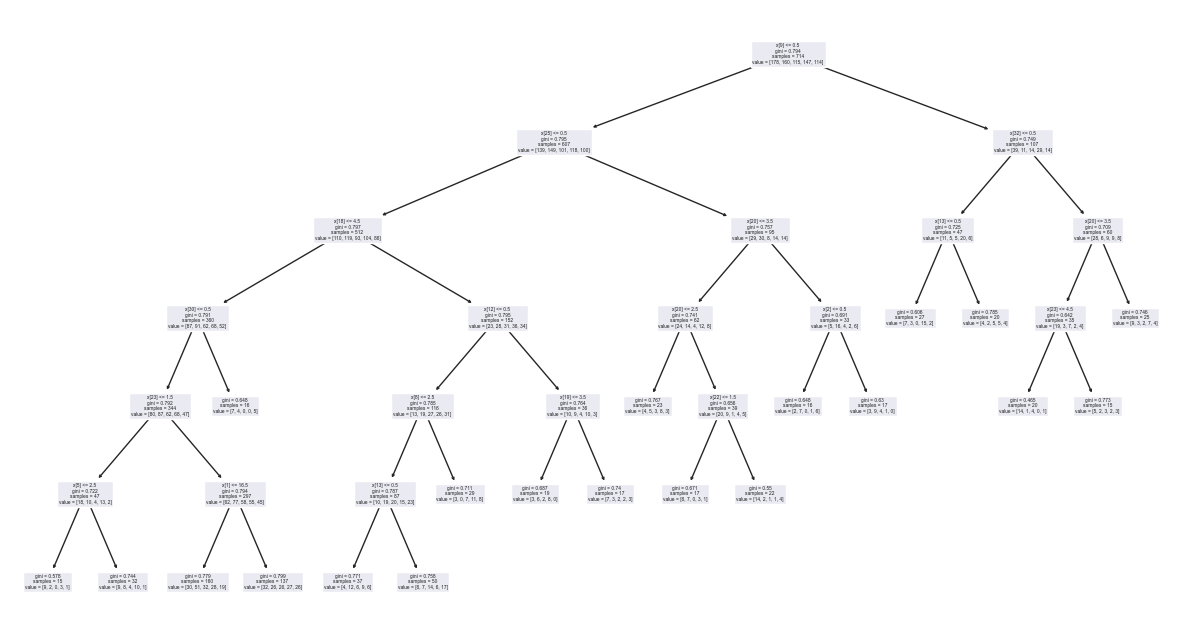

In [607]:
from sklearn import tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
tree.plot_tree(tree_class_model)

In [608]:
Cat_class_model_g3 = CatBoostClassifier()
Cat_class_model_g3.fit(mX_train_1, mY_train_1)
Cat_class_model_g3_predict = Cat_class_model_g3.predict(mX_test_1)
Cat_class_model_g3.score(mX_test_1, mY_test_1)

Learning rate set to 0.077779
0:	learn: 1.6055899	total: 2.26ms	remaining: 2.25s
1:	learn: 1.5991884	total: 6.11ms	remaining: 3.05s
2:	learn: 1.5905826	total: 9.14ms	remaining: 3.04s
3:	learn: 1.5825584	total: 12.3ms	remaining: 3.05s
4:	learn: 1.5763772	total: 15.4ms	remaining: 3.06s
5:	learn: 1.5678330	total: 18.6ms	remaining: 3.08s
6:	learn: 1.5627669	total: 21.6ms	remaining: 3.07s
7:	learn: 1.5577750	total: 25.1ms	remaining: 3.11s
8:	learn: 1.5526347	total: 28.7ms	remaining: 3.16s
9:	learn: 1.5459503	total: 32.1ms	remaining: 3.17s
10:	learn: 1.5372301	total: 35.3ms	remaining: 3.17s
11:	learn: 1.5319235	total: 38.7ms	remaining: 3.19s
12:	learn: 1.5242418	total: 42.1ms	remaining: 3.2s
13:	learn: 1.5181702	total: 45.4ms	remaining: 3.2s
14:	learn: 1.5099763	total: 48.8ms	remaining: 3.21s
15:	learn: 1.5022422	total: 52.1ms	remaining: 3.21s
16:	learn: 1.4969656	total: 55.7ms	remaining: 3.22s
17:	learn: 1.4928810	total: 59ms	remaining: 3.22s
18:	learn: 1.4863231	total: 62.4ms	remaining: 3.

0.1638655462184874

# Предсказывание других целей
## Например уровня буднего алкоголизма

In [609]:
#Разбиение на Train Test для классификации.
delete = ["Dalc","Walc"] #  "G1","G2","G3" или "G2","G3" или "G3"
target = ["Dalc"]

lab = preprocessing.LabelEncoder()
mX_train = train_df.drop(delete, axis = 1)
mY_train = train_df[target]
mX_test = test_df.drop(delete, axis = 1)
mY_test = test_df[target]
mY_train = lab.fit_transform(mY_train)
mY_test = lab.fit_transform(mY_test)

In [610]:
unique_values, counts = np.unique(mY_train, return_counts=True)
print(unique_values,counts)

[0 1 2 3 4] [504 125  48  18  19]


In [611]:
Logic_model_alc = LogisticRegression()
Logic_model_alc.fit(mX_train, mY_train)
Logic_model_alc_predict = Logic_model_alc.predict(mX_test)
Logic_model_alc.score(mX_test,mY_test)

0.6596638655462185

[Text(0.5, 1.0, 'Exam predictions Logic Regression alc'),
 Text(0.5, 0, 'True values'),
 Text(0, 0.5, 'Predicted values')]

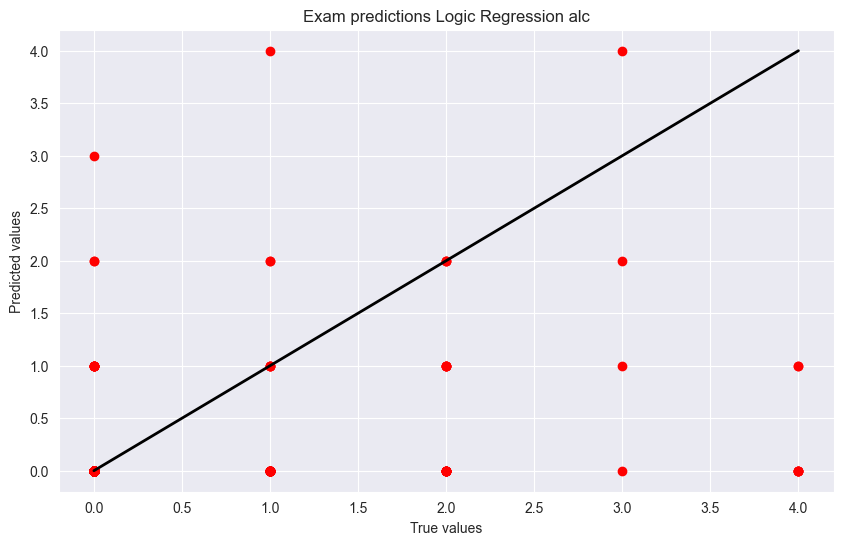

In [612]:
x_l = np.linspace(0,4,100)
y_l = x_l
fig, g1 = plt.subplots(1,1,figsize=(10,6))
g1.scatter(mY_test,Logic_model_alc_predict, c='r')
g1.plot(x_l, y_l, c='black', linewidth=2)
g1.set(title='Exam predictions Logic Regression alc', xlabel='True values', ylabel='Predicted values')

In [613]:
tree_class_model_alc = DecisionTreeClassifier(max_depth=6, min_samples_leaf=5)
tree_class_model_alc.fit(mX_train, mY_train)
tree_model_alc_predict = tree_class_model_alc.predict(mX_test)
tree_class_model_alc.score(mX_test,mY_test)

0.6764705882352942

[Text(0.4682017543859649, 0.9285714285714286, 'x[0] <= 0.5\ngini = 0.465\nsamples = 714\nvalue = [504, 125, 48, 18, 19]'),
 Text(0.22149122807017543, 0.7857142857142857, 'x[19] <= 2.5\ngini = 0.321\nsamples = 413\nvalue = [335, 58, 10, 7, 3]'),
 Text(0.10526315789473684, 0.6428571428571429, 'x[38] <= 0.5\ngini = 0.167\nsamples = 101\nvalue = [92, 4, 2, 3, 0]'),
 Text(0.08771929824561403, 0.5, 'x[20] <= 3.5\ngini = 0.083\nsamples = 93\nvalue = [89, 2, 1, 1, 0]'),
 Text(0.05263157894736842, 0.35714285714285715, 'x[39] <= 16.5\ngini = 0.049\nsamples = 80\nvalue = [78, 0, 1, 1, 0]'),
 Text(0.03508771929824561, 0.21428571428571427, 'x[7] <= 2.5\ngini = 0.026\nsamples = 75\nvalue = [74, 0, 0, 1, 0]'),
 Text(0.017543859649122806, 0.07142857142857142, 'gini = 0.0\nsamples = 68\nvalue = [68, 0, 0, 0, 0]'),
 Text(0.05263157894736842, 0.07142857142857142, 'gini = 0.245\nsamples = 7\nvalue = [6, 0, 0, 1, 0]'),
 Text(0.07017543859649122, 0.21428571428571427, 'gini = 0.32\nsamples = 5\nvalue = [4, 0

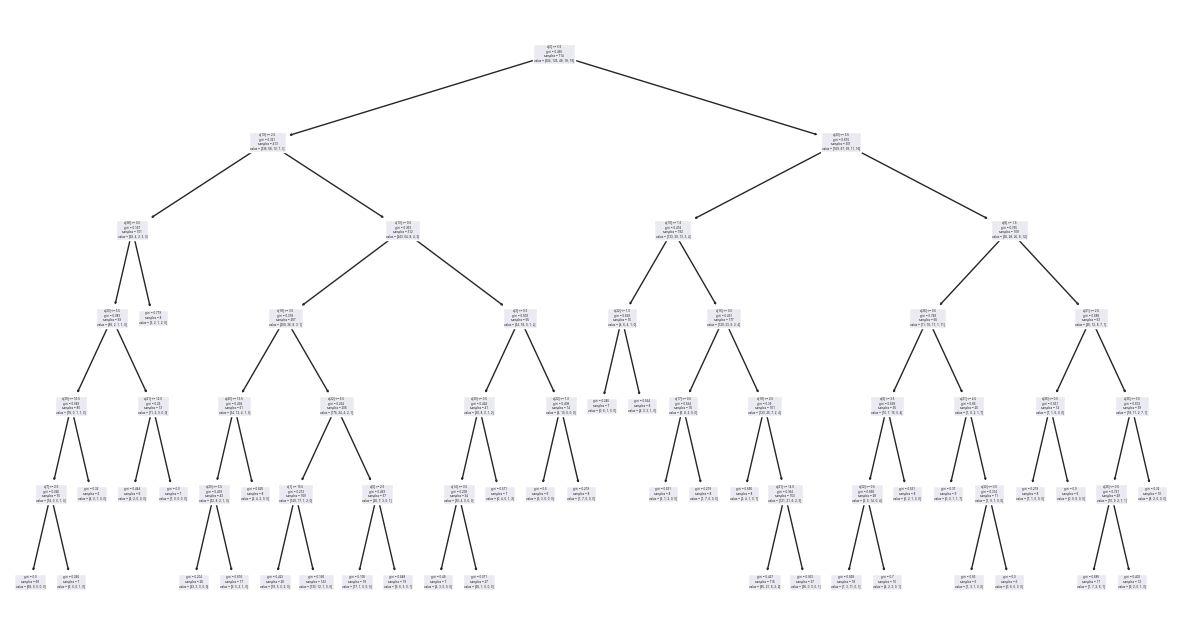

In [614]:
from sklearn import tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
tree.plot_tree(tree_class_model_alc)

[Text(0.5, 1.0, 'Exam predictions Logic Regression alc'),
 Text(0.5, 0, 'True values'),
 Text(0, 0.5, 'Predicted values')]

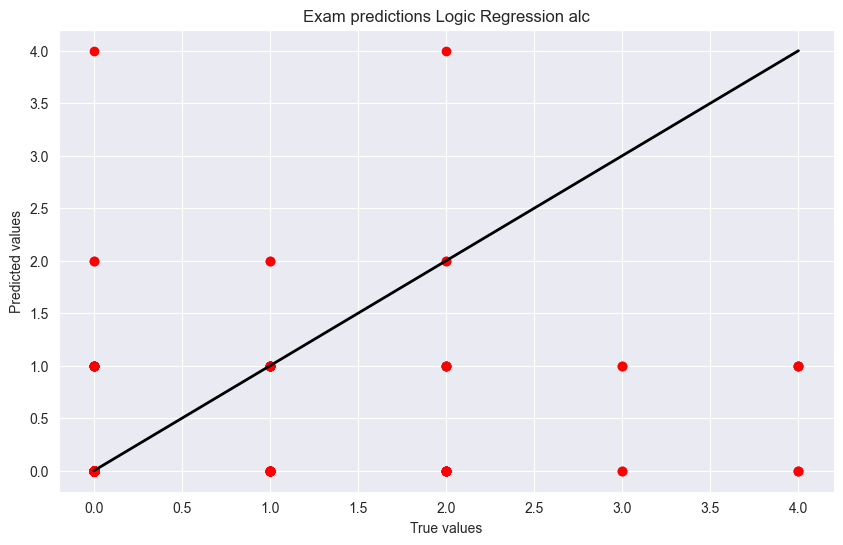

In [615]:
x_l = np.linspace(0,4,100)
y_l = x_l
fig, g1 = plt.subplots(1,1,figsize=(10,6))
g1.scatter(mY_test,tree_model_alc_predict, c='r')
g1.plot(x_l, y_l, c='black', linewidth=2)
g1.set(title='Exam predictions Logic Regression alc', xlabel='True values', ylabel='Predicted values')

In [616]:
Gradient_class_model_alc = GradientBoostingClassifier(max_depth=5,loss='deviance')
Gradient_class_model_alc.fit(mX_train,mY_train)
Gradient_class_model_alc_predict = Gradient_class_model_alc.predict(mX_test)
Gradient_class_model_alc.score(mX_test,mY_test)

0.7605042016806722

In [617]:
Cat_class_model = CatBoostClassifier()
Cat_class_model.fit(mX_train, mY_train)
Cat_class_model_alc_predict = Cat_class_model.predict(mX_test)
Cat_class_model.score(mX_test, mY_test)

Learning rate set to 0.077779
0:	learn: 1.4938349	total: 6.02ms	remaining: 6.01s
1:	learn: 1.4154335	total: 10ms	remaining: 5.01s
2:	learn: 1.3419193	total: 15ms	remaining: 4.97s
3:	learn: 1.2840920	total: 18.9ms	remaining: 4.71s
4:	learn: 1.2292735	total: 22.8ms	remaining: 4.54s
5:	learn: 1.1848950	total: 26.4ms	remaining: 4.38s
6:	learn: 1.1497212	total: 30.1ms	remaining: 4.27s
7:	learn: 1.1158512	total: 34.5ms	remaining: 4.28s
8:	learn: 1.0840454	total: 38.3ms	remaining: 4.22s
9:	learn: 1.0578425	total: 42.1ms	remaining: 4.17s
10:	learn: 1.0296674	total: 45.6ms	remaining: 4.1s
11:	learn: 1.0052099	total: 49.3ms	remaining: 4.05s
12:	learn: 0.9849014	total: 53.4ms	remaining: 4.05s
13:	learn: 0.9647632	total: 57ms	remaining: 4.01s
14:	learn: 0.9452591	total: 60.3ms	remaining: 3.96s
15:	learn: 0.9278746	total: 63.9ms	remaining: 3.93s
16:	learn: 0.9107908	total: 67.7ms	remaining: 3.91s
17:	learn: 0.8956097	total: 71ms	remaining: 3.87s
18:	learn: 0.8833556	total: 74.2ms	remaining: 3.83s
1

0.8067226890756303

[Text(0.5, 1.0, 'Exam predictions Cat boost alc'),
 Text(0.5, 0, 'True values'),
 Text(0, 0.5, 'Predicted values')]

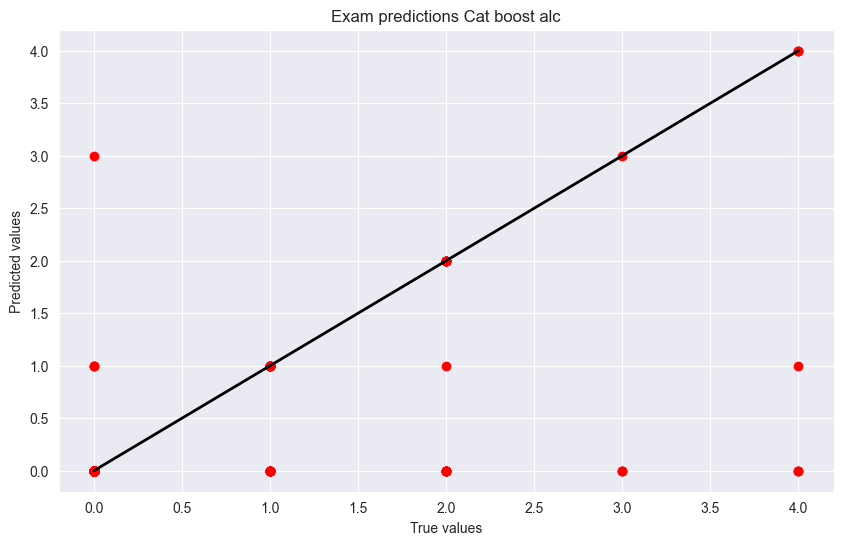

In [618]:
x_l = np.linspace(0,4,100)
y_l = x_l
fig, g1 = plt.subplots(1,1,figsize=(10,6))
g1.scatter(mY_test,Cat_class_model_alc_predict, c='r')
g1.plot(x_l, y_l, c='black', linewidth=2)
g1.set(title='Exam predictions Cat boost alc', xlabel='True values', ylabel='Predicted values')

In [619]:
Cat_class_model_alc_predict

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [3],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [2],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [4],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    